<a href="https://colab.research.google.com/github/bharathgaddam1712/Trading_RL/blob/main/Trading_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Installing Dependencies


In [1]:
!pip install gym-anytrading

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 5.0 MB/s eta 0:00:00


In [2]:


import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')

print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


In [3]:
!pip install 'stable-baselines3[extra]'

In [4]:
import gymnasium as gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
# env = gym.make('forex-v0')
# # env = gym.make('stocks-v0')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/US_Stock.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,03/13/2025,22.05,22.25,21.56,21.95,"3,829,828"
1,03/12/2025,22.95,23.24,21.89,21.99,"3,718,208"
2,03/11/2025,22.35,22.98,22.08,22.61,"4,226,922"
3,03/10/2025,23.44,23.58,22.26,22.42,"6,226,934"
4,03/07/2025,24.00,24.35,23.52,24.00,"3,463,954"


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Volume,object


In [7]:
df.set_index('Date', inplace = True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-03-13,22.05,22.25,21.56,21.95,"3,829,828"
2025-03-12,22.95,23.24,21.89,21.99,"3,718,208"
2025-03-11,22.35,22.98,22.08,22.61,"4,226,922"
2025-03-10,23.44,23.58,22.26,22.42,"6,226,934"
2025-03-07,24.00,24.35,23.52,24.00,"3,463,954"


In [8]:
env = gym.make(
    'stocks-v0',
    df=df,
    window_size=5,
    frame_bound=(5, 100),

)

2. Build ENV

In [9]:
env.action_space

Discrete(2)

In [10]:
print("env information:")
print("> shape:", env.unwrapped.shape)
print("> df.shape:", env.unwrapped.df.shape)
print("> prices.shape:", env.unwrapped.prices.shape)
print("> signal_features.shape:", env.unwrapped.signal_features.shape)
print("> max_possible_profit:", env.unwrapped.max_possible_profit())

env information:
> shape: (5, 2)
> df.shape: (22, 5)
> prices.shape: (22,)
> signal_features.shape: (22, 2)
> max_possible_profit: 1.271582756663462


In [12]:
print()
print("custom_env information:")
print("> shape:", env.unwrapped.shape)
print("> df.shape:", env.unwrapped.df.shape)
print("> prices.shape:", env.unwrapped.prices.shape)
print("> signal_features.shape:", env.unwrapped.signal_features.shape)
print("> max_possible_profit:", env.unwrapped.max_possible_profit())


custom_env information:
> shape: (5, 2)
> df.shape: (22, 5)
> prices.shape: (22,)
> signal_features.shape: (22, 2)
> max_possible_profit: 1.271582756663462


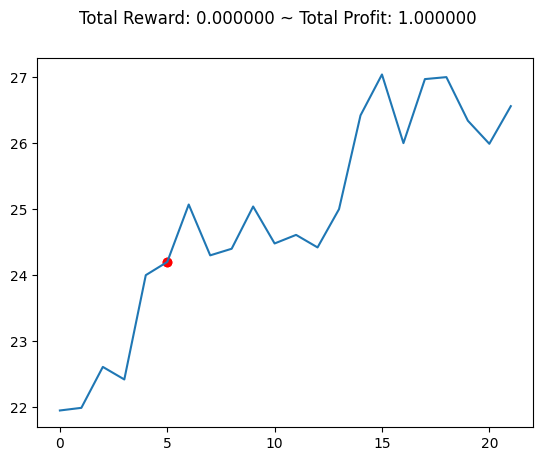

In [13]:
env.reset()
env.render()

info: {'total_reward': -186.4004135131836, 'total_profit': 0.9803492119553395, 'position': <Positions.Long: 1>}


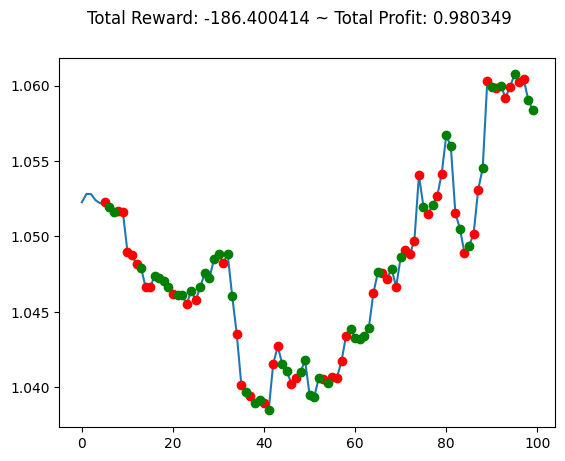

In [14]:
import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym
import gym_anytrading



env = gym.make('forex-v0', frame_bound=(5, 100), window_size=5)


observation = env.reset(seed=2023)
while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.unwrapped.render_all()
plt.show()

3. Build ENV & Train

In [15]:
env_maker = lambda : gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [16]:
from stable_baselines3 import A2C

In [17]:
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=10000)

Using cuda device


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run A2C on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


------------------------------------
| time/                 |          |
|    fps                | 170      |
|    iterations         | 100      |
|    time_elapsed       | 2        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.685   |
|    explained_variance | -0.0345  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.208    |
|    value_loss         | 0.299    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 236      |
|    iterations         | 200      |
|    time_elapsed       | 4        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.675   |
|    explained_variance | 0.113    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -0.41    |
|    value_loss         | 0.448    |
-